# Monte Carlo: 2D Ising Model-4

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Critical exponents and finite size scaling

In [3]:
# initialize system parameters
J = 1.0
kB = 1.0
Tc = 2/np.log(1+np.sqrt(2))

# Hamiltonian
def energy(s, L):
    E = 0
    for i in range(L):
        for j in range(L):
            E += s[i,j] * (s[(i+1)%L, j] + s[i, (j+1)%L])
    energy = -J * E
    return energy

# magnetization
def magnet(s, L):
    M = 0.0
    for i in range(L):
        for j in range(L):
            M += s[i,j]
    return M

def random_spins(L):
    s = np.zeros([L,L], int)
    for i in range(L):
        for j in range(L):
            s[i,j] = 2 * int( 2 * np.random.random() ) -1
    return s

def dE(s, L, i, j):
    NB = s[(i+1)%L,j]+s[i,(j+1)%L]+s[(i-1)%L,j]+s[i,(j-1)%L]
    dE = 2 * s[i,j]*NB
    return dE

def printSPINS(s, L):
    for i in range(L):
        row = ''
        for j in range(L):
            if s[i,j] == +1: row += '＋'
            if s[i,j] == -1: row += '－'
        print(row)
    print()

In [4]:
def Monte_Carlo(T, L, N_MC, spins):
    # initialize measurements
    beta = 1.0/(kB*T)
    
    accept = 0
    E = np.empty(N_MC)
    M = np.empty(N_MC)

    # main MC loop
    for n in range(N_MC):
        # random update
        for update in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                spins[i,j] = -spins[i,j]
                accept += 1
        # measurements
        E[n] = energy(spins, L)
        M[n] = magnet(spins, L)
    
    acceptRatio = accept/(N_MC*(L*L)) #  per spin

    return acceptRatio, spins, E, M

In [13]:
def MC_average(T, E, M):
    N_MC = len(E)
    
    E_sqr = E * E
    E_mean = E.mean()
    E_sqr_mean = E_sqr.mean()
    C = (E_sqr_mean-E_mean*E_mean)/(kB*T*T)
        
    M_abs = np.absolute(M)    
    M_sqr = M * M
    M_mean = M.mean()
    M_abs_mean = M_abs.mean()
    M_sqr_mean = M_sqr.mean()
    Chi = (M_sqr_mean-M_mean*M_mean)/(kB*T)
    Chi_abs = (M_sqr_mean-M_abs_mean*M_abs_mean)/(kB*T)    

    return E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean

In [14]:
def exact(T):
    beta = 1/(kB*T)
    
    Z = 2*np.exp(8*beta) + 12 + 2*np.exp(-8*beta)
    E = -(2*8*np.exp(8*beta)+2*(-8)*np.exp(-8*beta))/Z
    E_sqr = (2*64*np.exp(8*beta)+2*64*np.exp(-8*beta))/Z
    M_abs = (2*4*np.exp(8*beta)+8*2)/Z
    M_sqr = (2*16*np.exp(8*beta)+8*4)/Z
    
    return E, E_sqr, M_abs, M_sqr

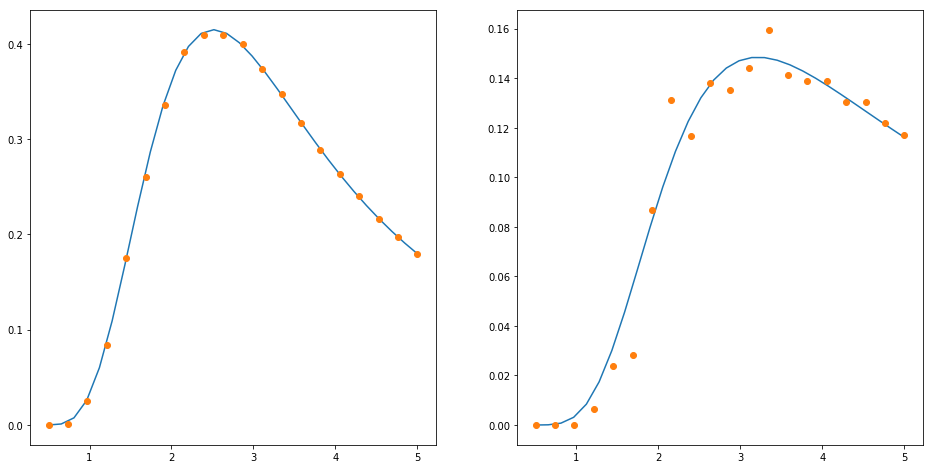

In [25]:
L = 2 
N = L * L
T = np.linspace(0.5, 5, 30)

fig, ax = plt.subplots(1, 2, figsize=(16,8))

# exact
E, E_sqr, M_abs, M_sqr = exact(T)
C = (E_sqr - E*E)/(kB*T*T)
chi = (M_sqr-M_abs*M_abs)/(kB*T)

ax[0].plot(T, C/N, '-')
ax[1].plot(T, chi/N, '-')

# Monte Carlo
N_equilib = 100
N_MC = 10**5

T_all = np.linspace(0.5, 5, 20)
C_all = np.empty_like(T_all)
Chi_abs_all = np.empty_like(T_all)

for i, T in enumerate(T_all):
    spins = random_spins(L)
    _, _, _, _ = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E, M = Monte_Carlo(T,L,N_MC,spins)

    E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean = MC_average(T, E, M)
    C_all[i] = C
    Chi_abs_all[i] = Chi_abs
    
ax[0].plot(T_all, C_all/N, 'o')
ax[1].plot(T_all, Chi_all/N, 'o')

## Critical exponents

In terms of the dimensionless reduced temperature $t \equiv (T-T_c)/T_c$.

The exponent $\alpha$ for specific heat in zero field:
$$
  C \sim A_\pm |t|^{-\alpha}.
$$

The exponent $\beta$ for the order parameter below the critical temperature:
$$
  M \sim |t|^{\beta}.
$$

The exponent $\gamma$ for the zero-field susceptibility:
$$
  \chi \sim A_\pm |t|^{-\gamma}.
$$

The exponent $\delta$ for the order parameter at the critical temperature:
$$
  M \sim |h|^{1/\delta}.
$$

The exponent $\nu$ for the correlation length:
$$
  \xi \sim |t|^{-\nu}.
$$

The exponent $\eta$ for the anomalous dimension:
$$
  G(r) \sim \frac{1}{r^{d-2+\eta}.
$$

The dynamical exponent $z$ for the relaxation time:
$$
  \tau \sim \xi^z.
$$

## Critical exponents for the 2D Ising model

| exponents | D=2 | 
| --- | --- | 
| $\alpha$ | 0 | 
| $\beta$ | 1/8 |
| $\gamma$ | 7/4 |
| $\delta$ | 15|
| $\nu$ | 1 | 

## Finite size scaling hypothesis

If $L \ll \xi$ then $L$ should be the most relevant length-scale. For a qnautity $Q$ such that
$$
  Q \sim |t|^{-\kappa}.
$$
We can use
$$
  |t| \sim \xi^{-1/\nu}
$$
to write $Q$ as
$$
  Q \sim \xi^{\kappa/\nu},
$$
which is valid when $\xi \ll L$.

When $\xi \sim L$, we expect
$$
  Q_{max}(L) \sim L^{\kappa/\nu},
$$
and
$$
  |t_{max}(L)| \sim L^{-1/\nu}.
$$

**Finte-size scaling hypothesis**
$$
  Q(t, L) = L^{\kappa/\nu} g(t L^{1/\nu}),
$$

** Data collapse and scaling function **
Define 
$$
  y_L \equiv Q(t, L) L^{-\kappa/\nu}, \;
  x_L \equiv t L^{1/\nu},
$$
and plot $y_L$ versus $x_L$ for different sizes. Then
$$
  g(x) = y_{L\rightarrow \infty}(x).
$$